# Pandas -- A Python Library for Working with Data Frames

In [33]:
import pandas as pd
import numpy as np

# Loading Data

In [34]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df.shape

(150, 5)

# Basic Data Handling (lambda vs map)

In [37]:
df['variety'] = df['variety'].apply(lambda x: 0 if x == 'Setosa' else x)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
def some_func(x):
    return 'Hello World ' + str(x)

some_func(123)

'Hello World 123'

In [39]:
f = lambda x: 'Hello World ' + str(x)
f(123)

'Hello World 123'

# map

In [40]:
d = {'Setosa': 0,
     'Versicolor': 1,
     'Virginica': 2}

df = pd.read_csv('data/iris.csv')
df['variety'] = df['variety'].map(d)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### NumPy Arrays

In [42]:
np.unique(df['variety'])

array([0, 1, 2], dtype=int64)

In [43]:
y = df['variety'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [53]:
X = df.iloc[:, 1:5].values
X[:5] #first 5 rows in the NumPy array

array([[3.5, 1.4, 0.2, 0. ],
       [3. , 1.4, 0.2, 0. ],
       [3.2, 1.3, 0.2, 0. ],
       [3.1, 1.5, 0.2, 0. ],
       [3.6, 1.4, 0.2, 0. ]])

# mlxtend

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.plotting import scatterplotmatrix

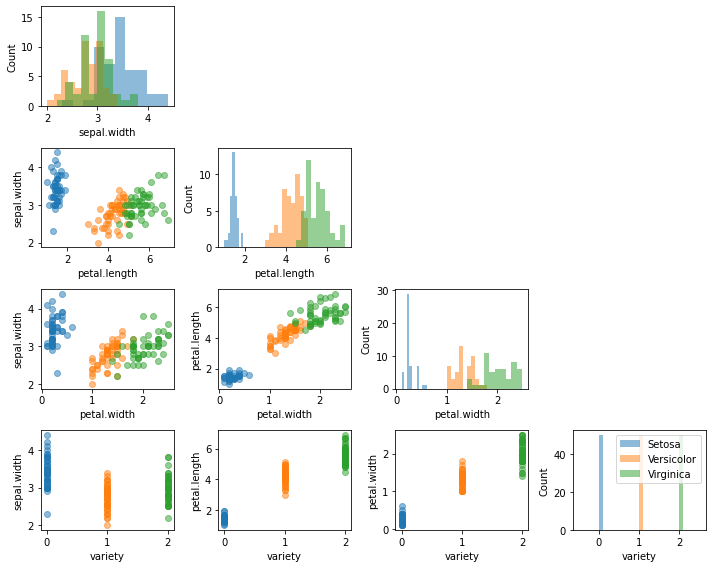

In [56]:
names = df.columns[1:5]

fig, axes = scatterplotmatrix(X[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==2], fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=['Setosa', 'Versicolor', 'Virginica'])
plt.savefig('data/eda.pdf')
plt.show()

## Splitting a Dataset into Train, Validation, and Test Subsets

In [63]:
#shuffling
indices = np.arange(X.shape[0])
rng = np.random.RandomState(123)
permuted_indices = rng.permutation(indices)
permuted_indices

array([ 72, 112, 132,  88,  37, 138,  87,  42,   8,  90, 141,  33,  59,
       116, 135, 104,  36,  13,  63,  45,  28, 133,  24, 127,  46,  20,
        31, 121, 117,   4, 130, 119,  29,   0,  62,  93, 131,   5,  16,
        82,  60,  35, 143, 145, 142, 114, 136,  53,  19,  38, 110,  23,
         9,  86,  91,  89,  79, 101,  65, 115,  41, 124,  95,  21,  11,
       103,  74, 122, 118,  44,  51,  81, 149,  12, 129,  56,  50,  25,
       128, 146,  43,   1,  71,  54, 100,  14,   6,  80,  26,  70, 139,
        30, 108,  15,  18,  77,  22,  10,  58, 107,  75,  64,  69,   3,
        40,  76, 134,  34,  27,  94,  85,  97, 102,  52,  92,  99, 105,
         7,  48,  61, 120, 137, 125, 147,  39,  84,   2,  67,  55,  49,
        68, 140,  78, 144, 111,  32,  73,  47, 148, 113,  96,  57, 123,
       106,  83,  17,  98,  66, 126, 109])

In [58]:
train_size, valid_size = int(0.65*X.shape[0]), int(0.15*X.shape[0])
test_size = X.shape[0] - (train_size + valid_size)
print(train_size, valid_size, test_size)

97 22 31


In [59]:
train_ind = permuted_indices[:train_size]
valid_ind = permuted_indices[train_size:(train_size + valid_size)]
test_ind = permuted_indices[(train_size + valid_size):]

In [60]:
X_train, y_train = X[train_ind], y[train_ind]
X_valid, y_valid = X[valid_ind], y[valid_ind]
X_test, y_test = X[test_ind], y[test_ind]

X_train.shape

(97, 4)